In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

df = pd.read_csv("heart.csv")

# de första raderna i datasetet
print(df.head())

print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [2]:
# Kontrollera kolumnnamn
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

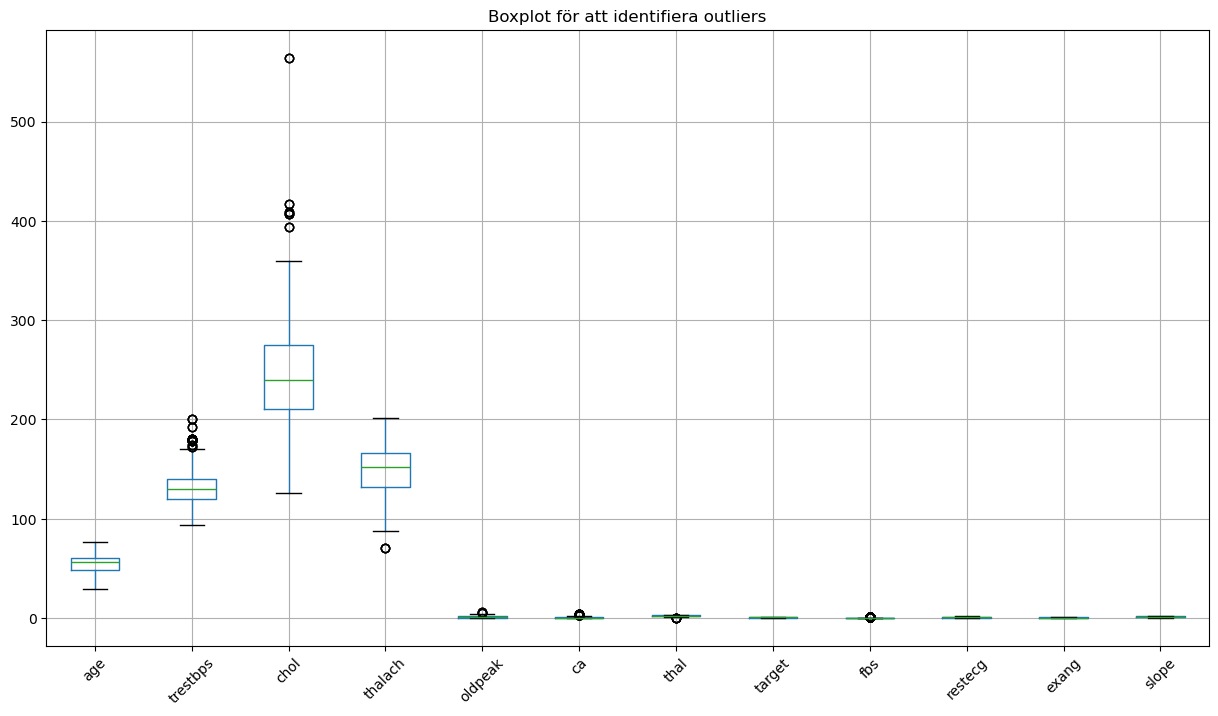

In [3]:
# Kontrollera för saknade värden
print(df.isnull().sum())

# Beskrivande statistik för numeriska variabler
print(df.describe())

# Visualisera outliers med hjälp av boxplots
numerical_columns =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'target', 'fbs', 'restecg', 'exang', 'slope']

plt.figure(figsize=(15, 8))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot för att identifiera outliers')
plt.show()


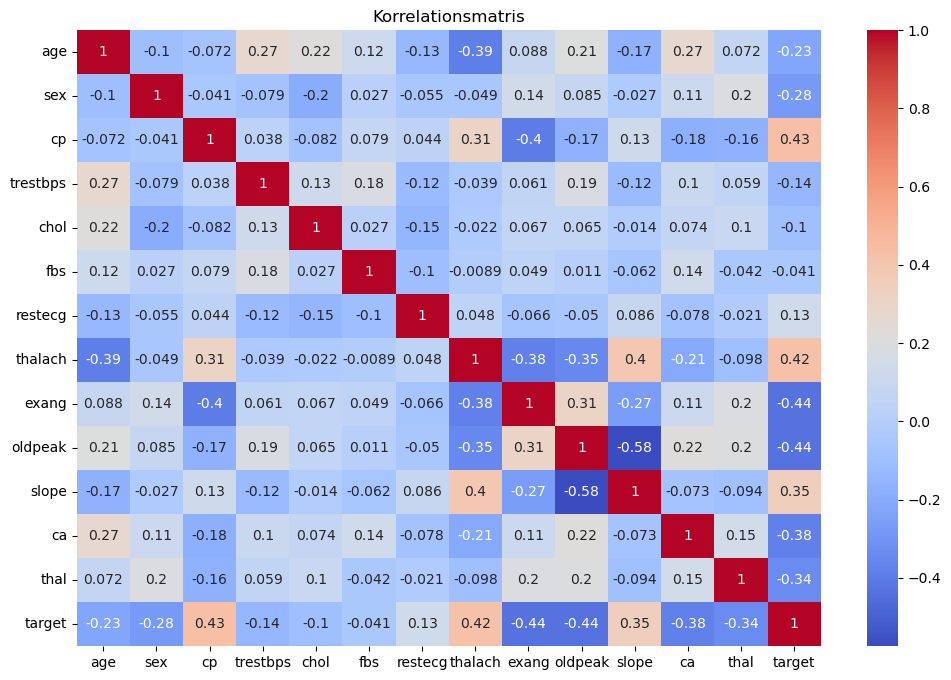

In [4]:
#EDA
# Korrelationsmatris
correlation_matrix = df.corr()

# Visualisera korrelationsmatrisen med en heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Korrelationsmatris")
plt.show()


<Figure size 1500x2000 with 0 Axes>

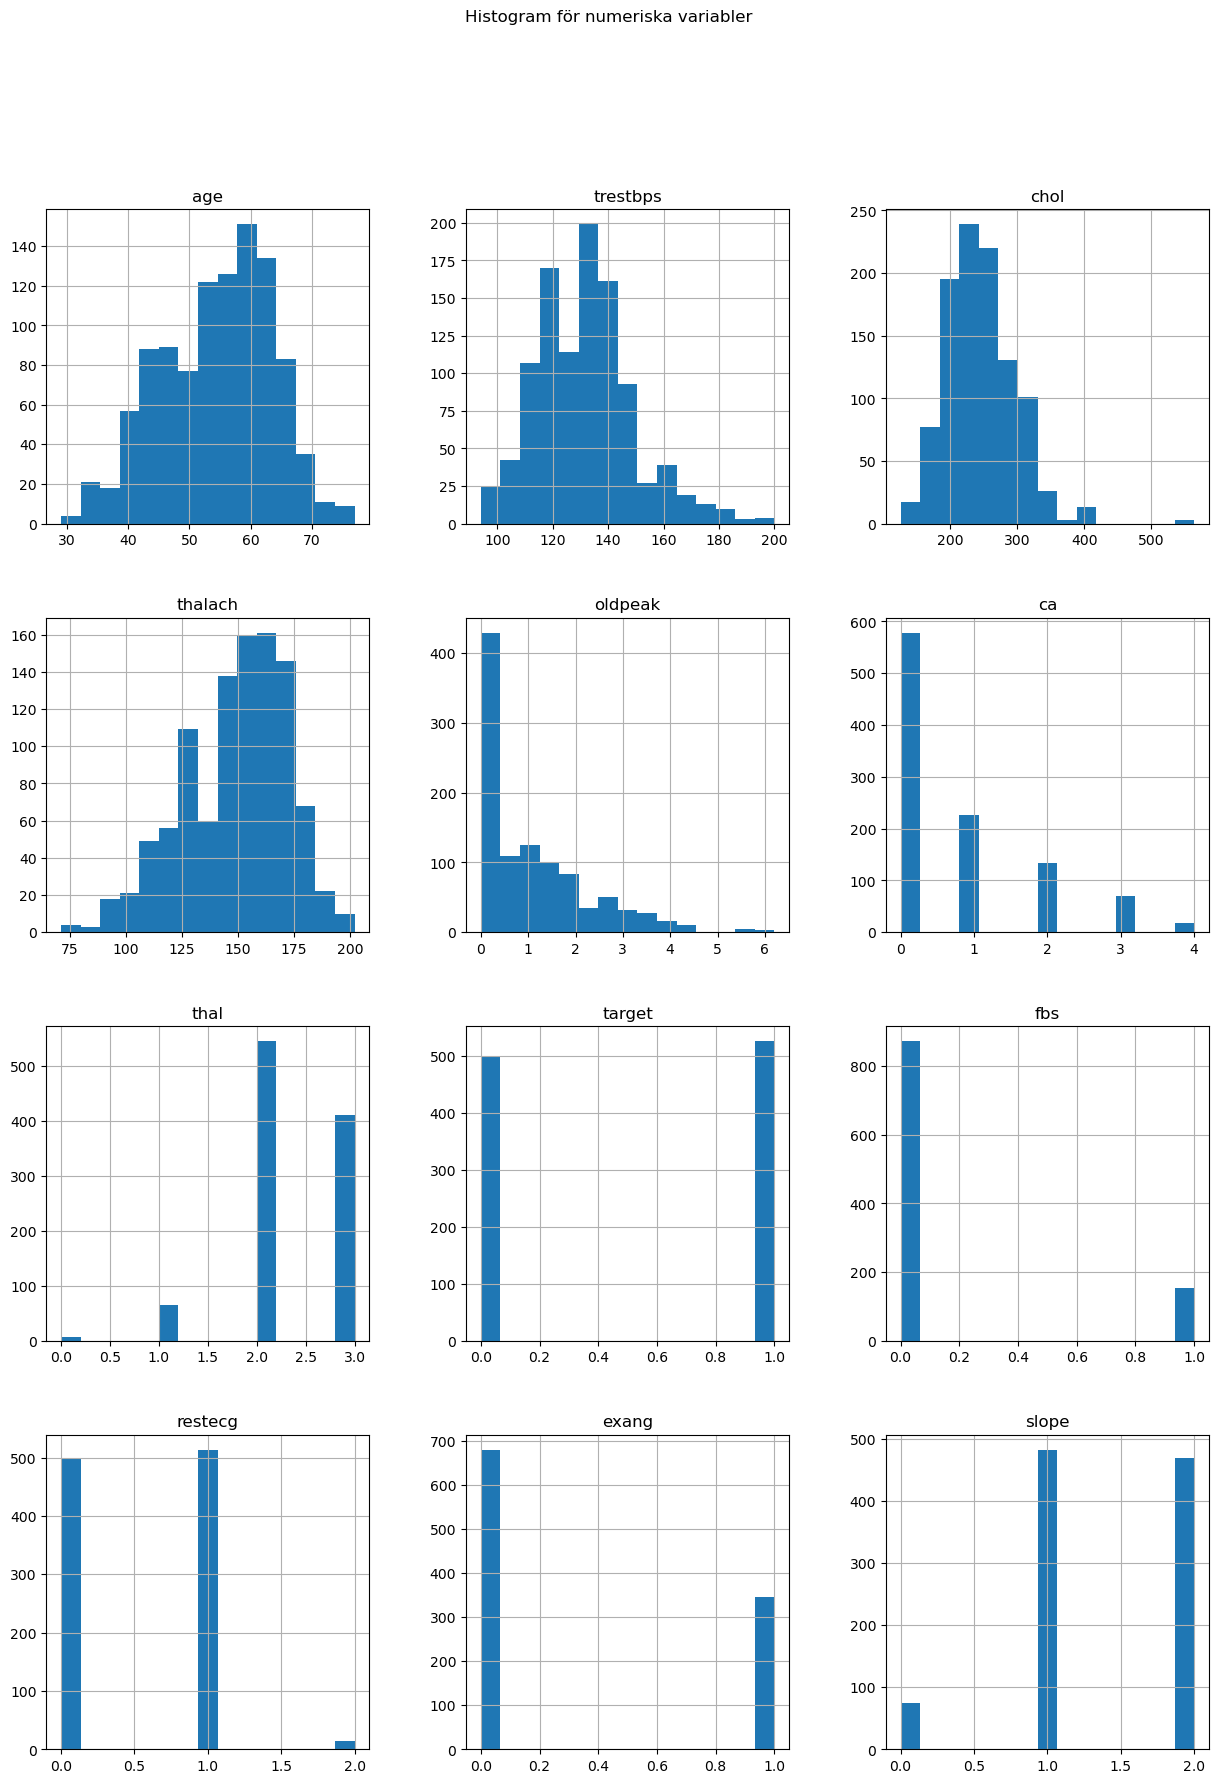

In [5]:
num_plots = len(numerical_columns)
num_rows = (num_plots + 2) // 3  # För att få tillräckligt med rader
plt.figure(figsize=(15, num_rows * 5))
df[numerical_columns].hist(bins=15, figsize=(15, num_rows * 5), layout=(num_rows, 3))
plt.suptitle('Histogram för numeriska variabler')
plt.show()


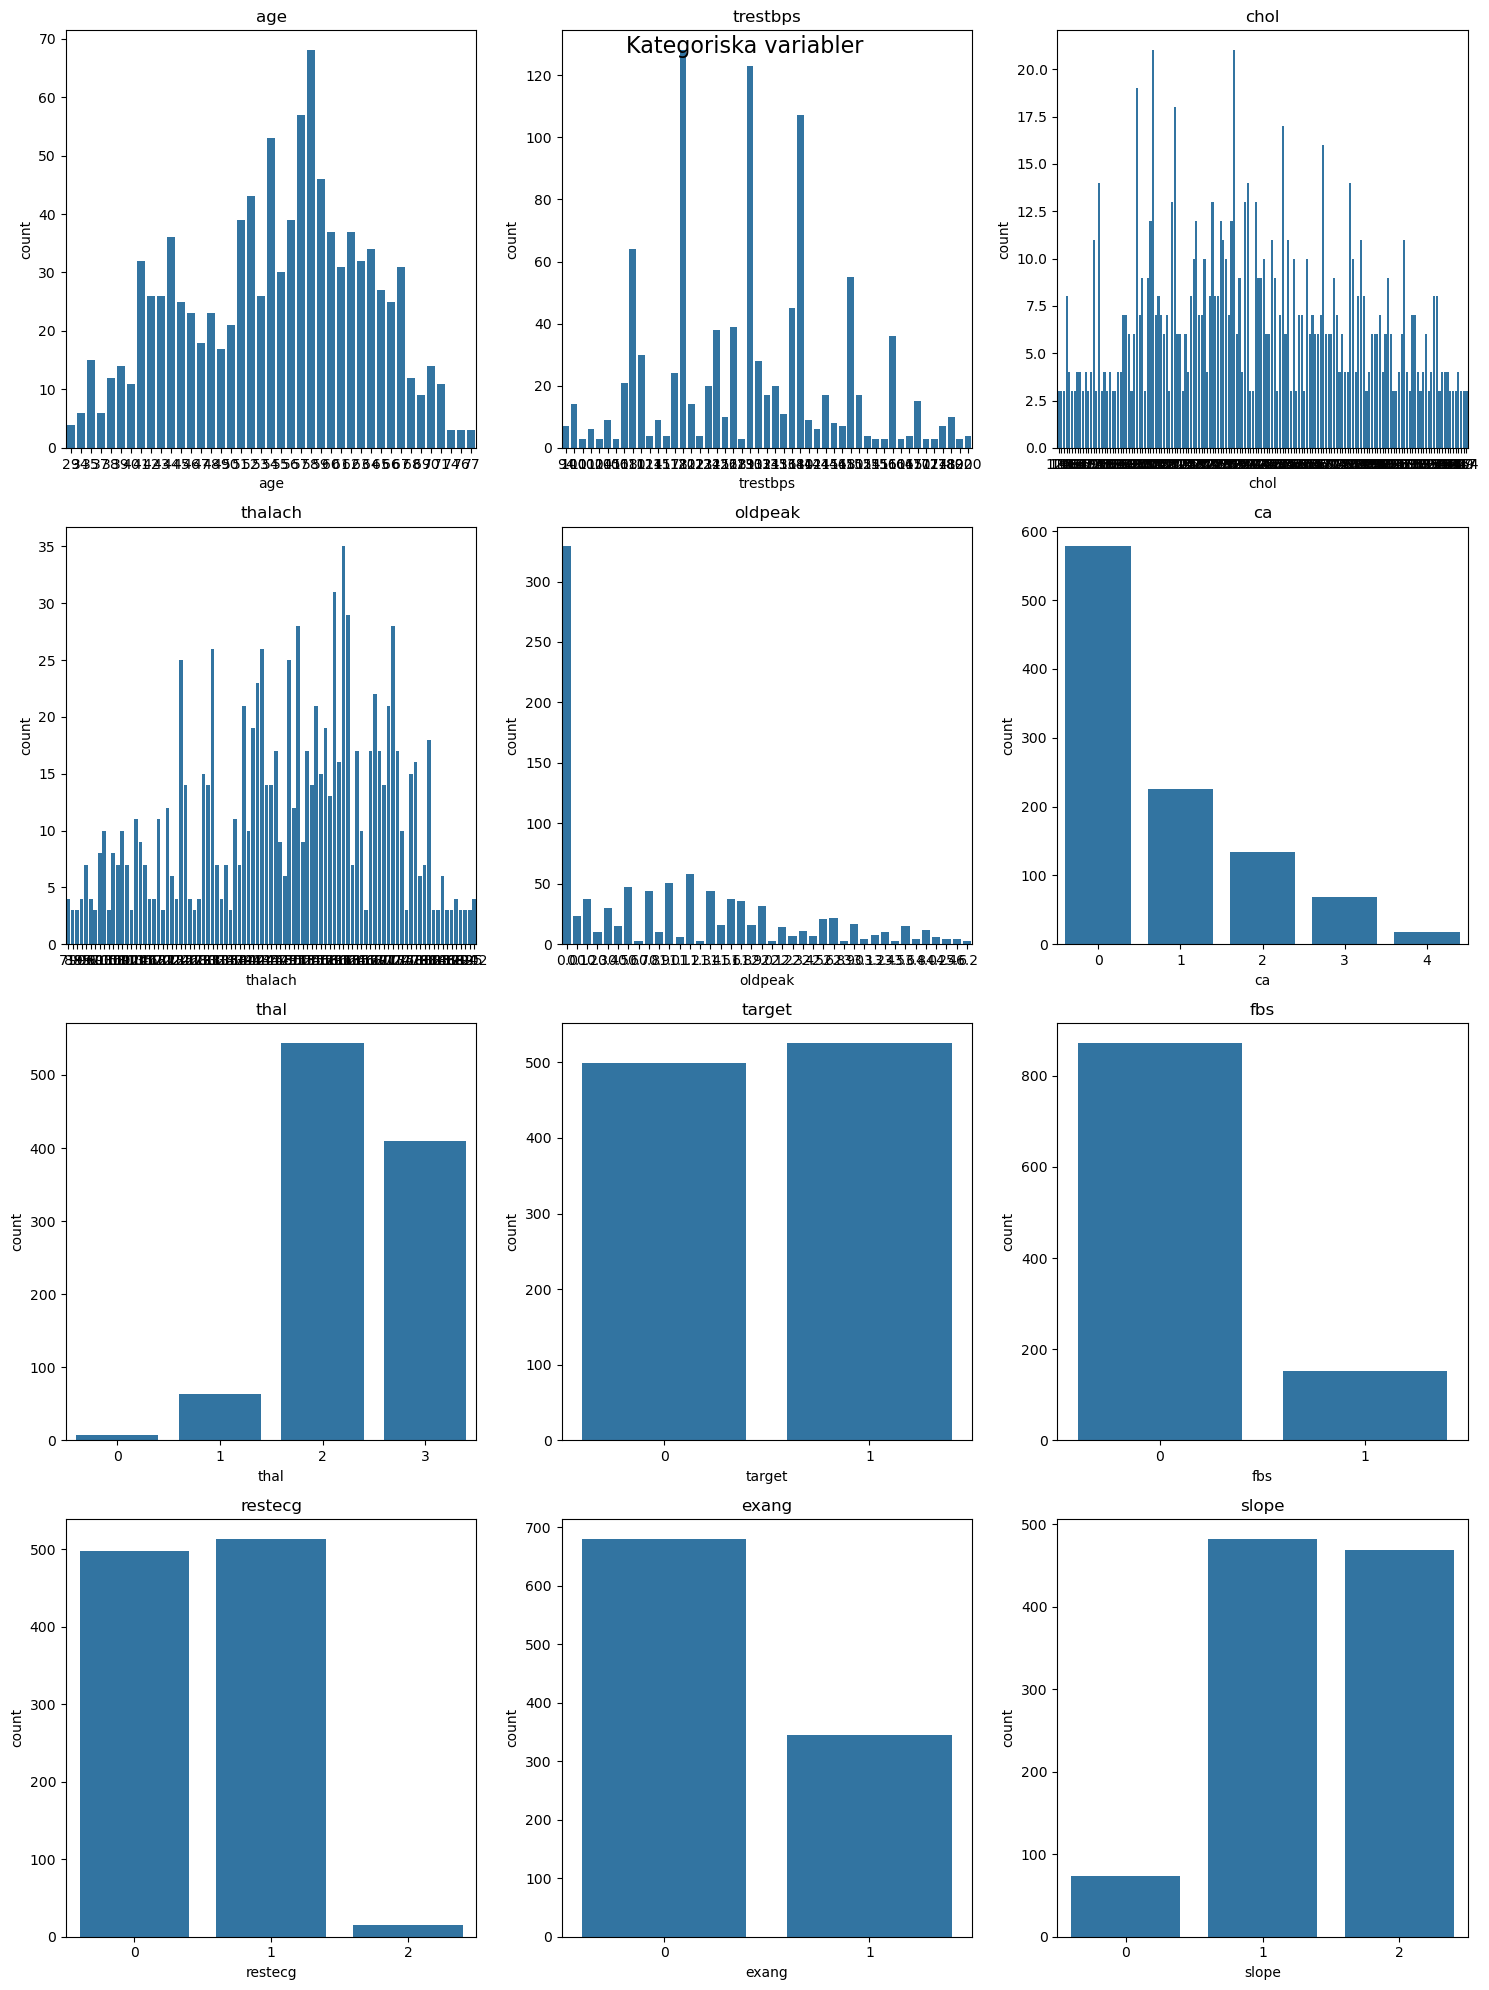

In [6]:
# Barplots för kategoriska variabler som kön och bröstsmärta
df.columns = df.columns.str.strip()
categorical_columns =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'target', 'fbs', 'restecg', 'exang', 'slope']

# Antal kategoriska kolumner
num_categorical = len(categorical_columns)

# Beräkna antalet rader och kolumner för subplotten
num_cols = 3  # Antal kolumner
num_rows = (num_categorical + num_cols - 1) // num_cols  # Antal rader

# Skapa subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Omvandla till en endimensionell array för enkel åtkomst

# Plotta varje kategorisk kolumn
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)

# Ta bort tomma subplots om det finns fler subplots än kategoriska kolumner
for j in range(num_categorical, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kategoriska variabler', fontsize=16)
plt.show()


In [7]:
#Hypotesprövning
# ANOVA för att jämföra medelvärden mellan olika bröstsmärttyper
f_val, p_val = stats.f_oneway(
    df[df['cp'] == 0]['age'],
    df[df['cp'] == 1]['age'],
    df[df['cp'] == 2]['age'],
    df[df['cp'] == 3]['age']
)

print(f"ANOVA resultat: F-värde = {f_val}, p-värde = {p_val}")


ANOVA resultat: F-värde = 12.713293588650242, p-värde = 3.672018484649832e-08


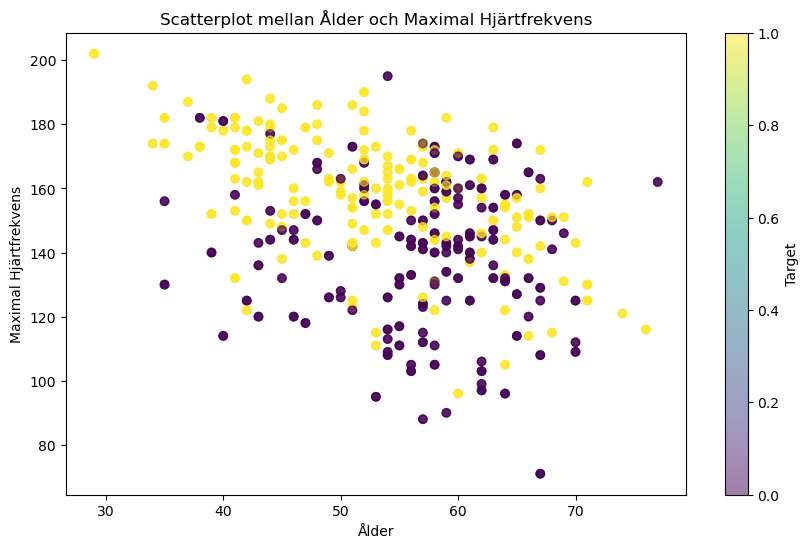

In [16]:
import matplotlib.pyplot as plt

# Skapa en scatterplot för ålder vs. maximal hjärtfrekvens
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['thalach'], alpha=0.5, c=df['target'], cmap='viridis')
plt.title('Scatterplot mellan Ålder och Maximal Hjärtfrekvens')
plt.xlabel('Ålder')
plt.ylabel('Maximal Hjärtfrekvens')
plt.colorbar(label='Target')
plt.show()


In [17]:
# T-test för att jämföra ålder mellan män och kvinnor
t_stat, p_val = stats.ttest_ind(df[df['sex'] == 0]['age'], df[df['sex'] == 1]['age'])
print(f"T-test resultat: T-värde = {t_stat}, p-värde = {p_val}")


T-test resultat: T-värde = 3.319815621092421, p-värde = 0.000932567449012682


In [18]:
# Välj features och target
X = df[['age', 'sex']]  # Exempel på features, lägg till fler om nödvändigt
y = df['thalach']  # Uppdaterad kolumnnamn

# Dela data i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa och träna linjär regressionsmodell
model = LinearRegression()
model.fit(X_train, y_train)

# Gör förutsägelser
y_pred = model.predict(X_test)

# Utvärdera modellens prestanda
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 453.27429208943107
R^2 Score: 0.16441019881663077


In [11]:
# Skapa och träna modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Gör förutsägelser på testdata
y_pred = model.predict(X_test)

# Utvärdera modellens prestanda
print(f"R²: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


R²: 0.16441019881663077
MSE: 453.27429208943107
RMSE: 21.290239361957184


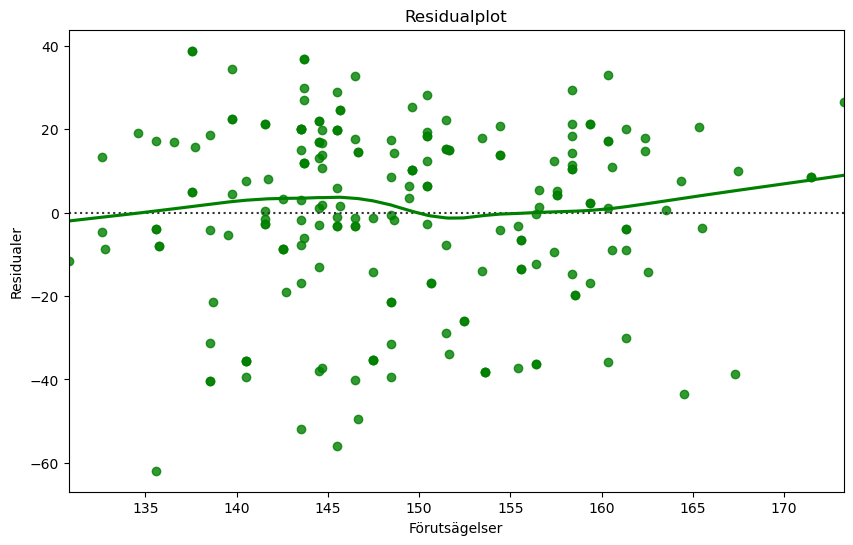

In [12]:
# Residualplot för att utvärdera modellen
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title("Residualplot")
plt.xlabel("Förutsägelser")
plt.ylabel("Residualer")
plt.show()


Berättelse om Datahantering (rapport)
1. Dataimport och Förberedelse
Började med att importera en dataset innehållande hjärthälsorelaterade variabler från en CSV-fil. När data laddades in i en DataFrame i Python med hjälp av biblioteket pandas, märkte vi att det fanns inkonsekvenser i kolumnnamnen, som extra mellanslag och felaktiga namn. För att hantera detta, renade vi kolumnnamnen genom att ta bort extra mellanslag med funktionen str.strip() och säkerställde att kolumnnamnen överensstämde med vad som faktiskt finns i datafilen.

2. Deskriptiv Statistik
Efter att ha säkerställt att data var renad och korrekt, började vi med att utforska datan genom att generera deskriptiv statistik. Då använde funktioner som describe() för att sammanställa information om medelvärde, median, standardavvikelse, min- och maxvärden för de numeriska variablerna såsom ålder, blodtryck (trestbps), kolesterol (chol), och maximal hjärtfrekvens (thalach).

Exempel:

Ålder: Medelvärde runt 54 år med en standardavvikelse på 9 år.
Blodtryck: Medelvärde på cirka 131 mmHg.
Kolesterol: Medelvärde på 246 mg/dl.
3. Visualisering av Data
För att bättre förstå fördelningarna av de numeriska variablerna, skapade histogram och boxplotar. Histogrammen visade hur variabler som ålder och blodtryck fördelar sig bland de undersökta personerna. Detta hjälpte oss att identifiera potentiella skevheter och outliers i data.

Histogram: Varje numerisk variabels histogram visade fördelningen av värden. Till exempel visade åldersfördelningen en normal fördelning med en topp runt 55 år.
Boxplotar: Användes för att identifiera outliers och visade median, kvartiler, och potentiella extrema värden i data.
4. Utforskning av Relationer Mellan Variabler
För att förstå sambandet mellan olika variabler, utförde vi korrelationsanalyser och visualiserade dessa samband med hjälp av scatterplots och värmekartor (heatmaps).

Korrelationsanalys: Så använde corr() för att undersöka sambanden mellan variabler. En stark positiv korrelation observerades mellan thalach (maximal hjärtfrekvens) och ålder, vilket innebär att äldre individer tenderade att ha en lägre maximal hjärtfrekvens.
Heatmap: Värmekartan visade hur starkt olika variabler är relaterade till varandra, där mörkare färger indikerar starkare korrelationer. Detta gav en visuell överblick av hur olika faktorer interagerar i hjärthälsa.
5. Hypotesprövning: ANOVA
För att undersöka om det fanns signifikanta skillnader i medelvärdet av ålder mellan de olika typerna av bröstsmärtor, utförde vi en ANOVA-test. Genom att jämföra åldersmedelvärdena för varje typ av bröstsmärta kunde vi fastställa om variationen mellan grupperna var statistiskt signifikant.

Resultat från ANOVA: ANOVA-testet visade att det fanns statistiskt signifikanta skillnader i åldersmedelvärden mellan de olika bröstsmärtgrupperna, vilket kan indikera att ålder är en faktor som påverkar typen av bröstsmärta.
Slutsats
Genom att systematiskt rena och analysera datasetet fick vi en djupare förståelse för hur olika faktorer som ålder, blodtryck, och kolesterolnivåer relaterar till hjärthälsa. Visualiseringarna och den statistiska analysen gav oss viktiga insikter, såsom identifiering av outliers och förståelse av korrelationer mellan variabler. Denna process hjälper oss att bättre förstå data och fatta välgrundade beslut i vidare analyser och tolkningar.